In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\MSI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


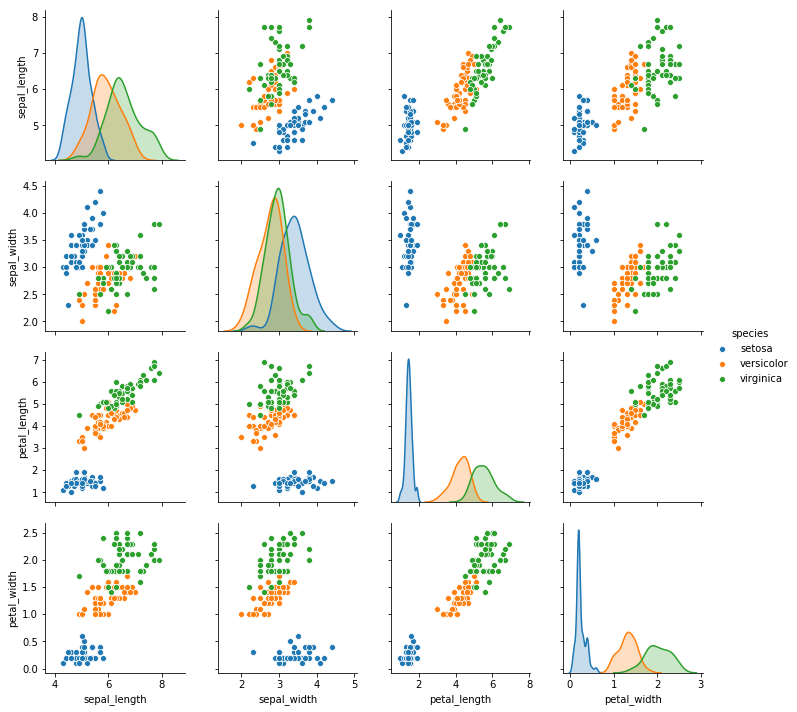

In [5]:
sns.pairplot(df, hue = 'species')

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters =3, random_state = 7)

In [8]:
kmeans.fit(df.drop('species', axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=7, tol=0.0001, verbose=0)

In [9]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [10]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [11]:
df['cluster'] = kmeans.labels_
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


## Encode the species

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
df['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [14]:
df.groupby('species')['petal_length'].mean()

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

In [15]:
le = LabelEncoder()
le.fit(df['species'])

df['species'] = le.transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [16]:
df.groupby('species')['petal_length'].mean()

species
0    1.462
1    4.260
2    5.552
Name: petal_length, dtype: float64

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
print(confusion_matrix(df['species'], df['cluster']))
print(classification_report(df['species'], df['cluster']))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

   micro avg       0.89      0.89      0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



In [19]:
kmeans.inertia_

78.85144142614601

In [20]:
inertia_list = []

for i in range(1,150):
    
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df.drop(['species', 'cluster'], axis = 1))
    inertia_list.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

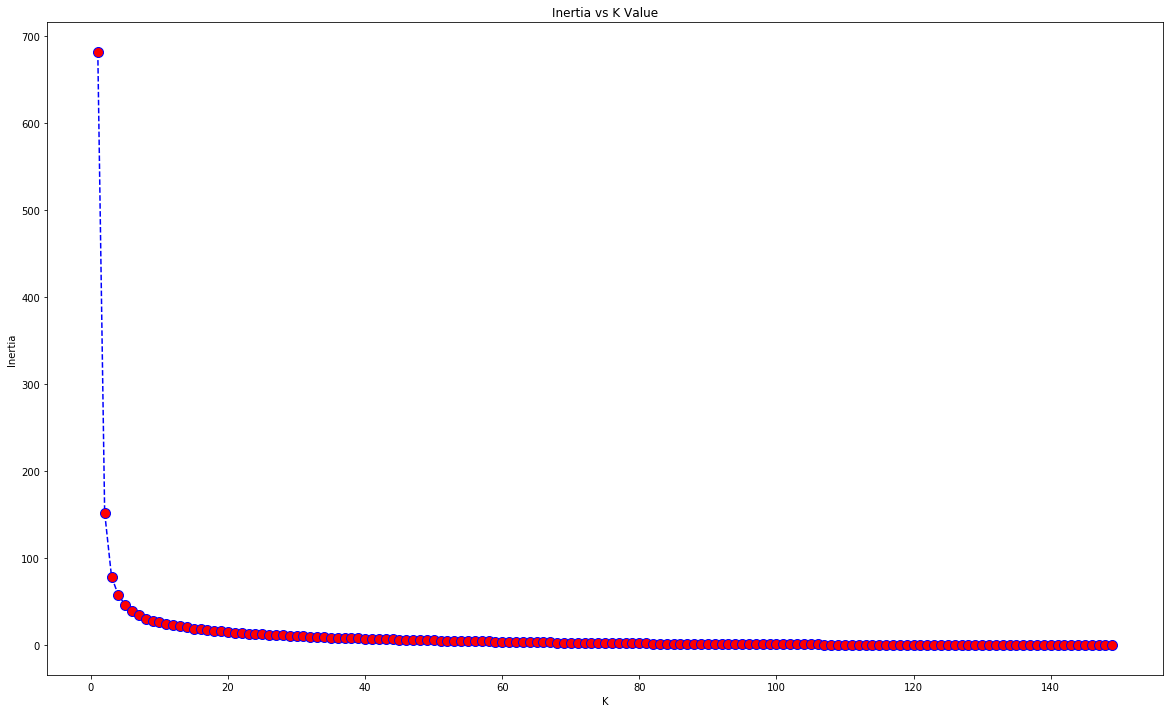

In [21]:
plt.figure(figsize = (20,12))
plt.plot(range(1,150), inertia_list, color = 'blue', linestyle = 'dashed', marker ='o', markerfacecolor = 'red',
         markersize = 10)
plt.title('Inertia vs K Value')
plt.xlabel('K')
plt.ylabel('Inertia')

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components = 2)

In [24]:
pca.fit(df.drop(['species', 'cluster'], axis = 1))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
x_pca = pca.transform(df.drop(['species', 'cluster'], axis =1))

In [26]:
dfpca = pd.DataFrame(x_pca, columns = ['PC 1', 'PC 2'])
dfpca['species'], dfpca['cluster'] = df['species'], df['cluster']
dfpca.head()

,PC 1,PC 2,species,cluster
0,-2.684126,0.319397,0,0
1,-2.714142,-0.177001,0,0
2,-2.888991,-0.144949,0,0
3,-2.745343,-0.318299,0,0
4,-2.728717,0.326755,0,0


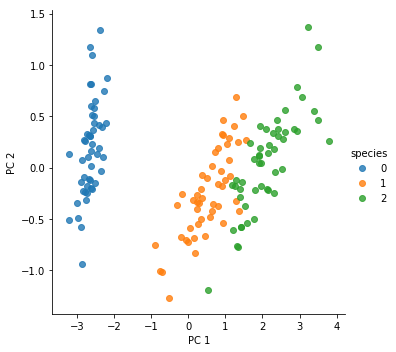

In [27]:
sns.lmplot(x='PC 1', y = 'PC 2', hue = 'species', data = dfpca, fit_reg =False)

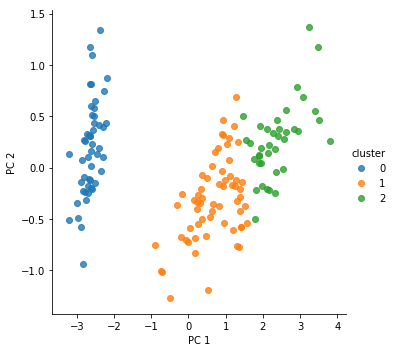

In [28]:
sns.lmplot(x='PC 1', y = 'PC 2', hue = 'cluster', data = dfpca, fit_reg =False)

In [29]:
kmeans = KMeans(n_clusters = 3, random_state = 27)
kmeans.fit(dfpca.drop(['species', 'cluster'], axis =1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=27, tol=0.0001, verbose=0)

In [30]:
kmeans.cluster_centers_

array([[-2.64241546,  0.19088505],
       [ 2.34652659,  0.27393856],
       [ 0.66567601, -0.3316042 ]])

In [31]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [32]:
dfpca['clusterpca'] = kmeans.labels_
dfpca.head()

,PC 1,PC 2,species,cluster,clusterpca
0,-2.684126,0.319397,0,0,0
1,-2.714142,-0.177001,0,0,0
2,-2.888991,-0.144949,0,0,0
3,-2.745343,-0.318299,0,0,0
4,-2.728717,0.326755,0,0,0


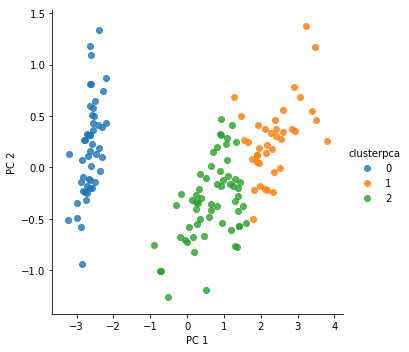

In [33]:
sns.lmplot(x='PC 1', y = 'PC 2', hue ='clusterpca', data =dfpca, fit_reg = False)